In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [32]:
data = pd.read_csv('camry.csv',names=['Price','Condition','Mileage','Age','Year'])
X = data.iloc[:, 1:5].values;
y = data.iloc[:, 0].values;
m = len(y);

data.head()

,Price,Condition,Mileage,Age,Year
0,1300000,1,1001,18,2001
1,3000000,1,1002,9,2010
2,1800000,1,1002,10,2009
3,1850000,2,1004,11,2008
4,1100000,2,1006,16,2003


In [33]:
data.shape

(2872, 5)

In [34]:
def h_of_x(X, theta):
    return np.dot(X,theta)

In [35]:
def computeCostMulti(X, y, theta):
    m = len(y)
    J = (np.sum((np.dot(X,theta) - y)**2))/(2*m)
    return J

In [36]:
# Mean Normalization
def	featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #======================

    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = np.divide((X - mu),sigma)

    #====================
    return X_norm, mu, sigma



In [37]:
# Scale features and set them to zero mean
print ('Normalizing Features ...')
X, mu, sigma = featureNormalize(X)
print ('[mu] [sigma]')
print (mu, sigma)

# Add intercept term to X
X = np.concatenate((np.ones((m, 1)), X), axis=1)

Normalizing Features ...
[mu] [sigma]
[1.23189415e+00 8.69660097e+04 1.07106546e+01 2.00828935e+03] [4.31021369e-01 5.96133156e+04 3.80507623e+00 3.80507623e+00]


In [38]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y); # number of training examples
    J_history = np.zeros([num_iters, 1]);

    for iter in range(num_iters):
        #============ Your code here =============
        #theta = theta - (alpha/m)*np.sum((h_of_x(X,theta)-y)[:,None]*X,axis=0)
        
        theta = theta - (alpha/m)*(np.dot(X.T,(h_of_x(X,theta)-y)))
        
        #==================================
        J_history[iter] = computeCostMulti(X, y, theta)
        



    return theta, J_history


In [39]:
# Choose some alpha value
alpha = 0.01
num_iters = 400

def gd(alpha):
    print ('Running gradient descent ...')
    # Init Theta and Run Gradient Descent 
    thet = np.zeros(5)
    thet, J_history = gradientDescentMulti(X, y, thet, alpha, num_iters)
    
    return thet, J_history

thet, J_history = gd(alpha)

Running gradient descent ...


Running gradient descent ...
Running gradient descent ...
Running gradient descent ...
Running gradient descent ...
Running gradient descent ...


C:\Users\otubela yusuf\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\otubela yusuf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


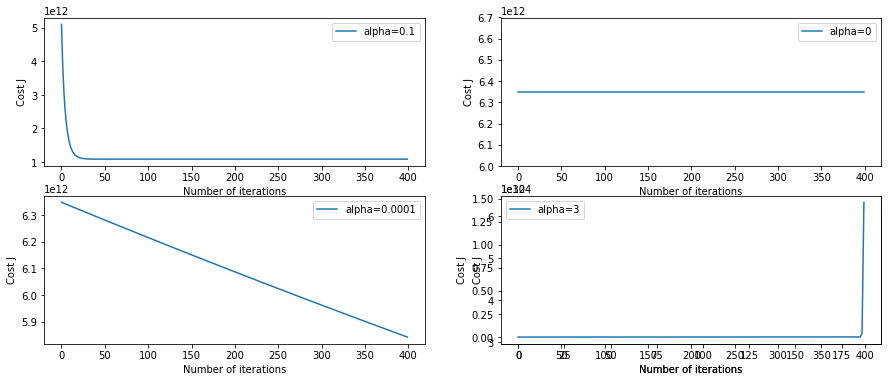

In [40]:
# Choose some alpha value
alphas = [0.001,0.1,0,.0001,3]
thetas = []
num_iters = 400

def costs():
    J = []
    for i in alphas:
        alpha = i
        thet, j = gd(i)
        J.append(j)
        thetas.append(thet)
    return J

J_hists = costs()

axs = []
fig = plt.figure(figsize=(15,6))
for i in range(len(J_hists)):
    axs.append(fig.add_subplot('22'+str(i)))
    axs[-1].plot(J_hists[i], label="alpha="+str(alphas[i]))
    axs[-1].set_xlabel('Number of iterations')
    axs[-1].set_ylabel('Cost J')
    #axs[-1].title = str(alphas[i])
    plt.show

    plt.legend()


In [41]:
thet

array([2823078.22117282, -236416.78167516, -146664.96542288,
       -678593.38813902,  678593.38813905])

In [42]:
print ('Theta computed from gradient descent: ')
print (thet)

price = None
# Estimate the price of a a car having 1201 mileage and 18 years old
####### START CODE ###########

example = np.array([[1, 1201, 18, 1, 1]])   # the test example
example_norm = np.ones(example.shape)  # a variable is initialized with an array of ones of same shape as the test example
                                        # this variable will hold the normalized features
    
    
example_norm.dtype = np.float # Note that the array datatype must be float32 and not int
    
    
# apply feature scaling and normalization
example_norm[:, 1:] = np.divide((example[:, 1:] - mu),sigma)


# Now make predictions
price = h_of_x(example_norm, thet)

####### END CODE ############

print ('Predicted price of a car having 1201 mileage and 18 years old')
print ('using gradient descent: ')
print (price)

Theta computed from gradient descent: 
[2823078.22117282 -236416.78167516 -146664.96542288 -678593.38813902
  678593.38813905]
Predicted price of a car having 1201 mileage and 18 years old
using gradient descent: 
[-1.01128629e+09]


In [46]:
thetas[3]

array([112723.35202872, -27212.7871111 , -21109.59074329, -56665.06233251,
        56665.06233251])

In [47]:
example_norm[:, 1:]

array([[ 2.78354669e+03, -1.45853336e+00, -2.55202629e+00,
        -5.27529338e+02]])